In [702]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [703]:
df=pd.read_csv("BOOM BIKE.csv")

In [704]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [705]:
df.drop("instant",axis=1,inplace=True)

In [706]:
df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [707]:
df.rename(columns={'hum':'humidity','cnt':'count',"dteday":'date'}, inplace=True)


In [708]:
df

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [709]:
df.drop(["casual","registered"],axis=1,inplace=True)

In [710]:
df.isna().sum()

date          0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

In [711]:
df.isnull().sum()

date          0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

In [712]:
df

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [713]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  humidity    730 non-null    float64
 11  windspeed   730 non-null    float64
 12  count       730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.3+ KB


In [714]:
for i in df.columns:
    print(f"the unique values in {i} are:" ,df[i].unique(), sep="\n")
    print("------------------------------")

the unique values in date are:
['01-01-2018' '02-01-2018' '03-01-2018' '04-01-2018' '05-01-2018'
 '06-01-2018' '07-01-2018' '08-01-2018' '09-01-2018' '10-01-2018'
 '11-01-2018' '12-01-2018' '13-01-2018' '14-01-2018' '15-01-2018'
 '16-01-2018' '17-01-2018' '18-01-2018' '19-01-2018' '20-01-2018'
 '21-01-2018' '22-01-2018' '23-01-2018' '24-01-2018' '25-01-2018'
 '26-01-2018' '27-01-2018' '28-01-2018' '29-01-2018' '30-01-2018'
 '31-01-2018' '01-02-2018' '02-02-2018' '03-02-2018' '04-02-2018'
 '05-02-2018' '06-02-2018' '07-02-2018' '08-02-2018' '09-02-2018'
 '10-02-2018' '11-02-2018' '12-02-2018' '13-02-2018' '14-02-2018'
 '15-02-2018' '16-02-2018' '17-02-2018' '18-02-2018' '19-02-2018'
 '20-02-2018' '21-02-2018' '22-02-2018' '23-02-2018' '24-02-2018'
 '25-02-2018' '26-02-2018' '27-02-2018' '28-02-2018' '01-03-2018'
 '02-03-2018' '03-03-2018' '04-03-2018' '05-03-2018' '06-03-2018'
 '07-03-2018' '08-03-2018' '09-03-2018' '10-03-2018' '11-03-2018'
 '12-03-2018' '13-03-2018' '14-03-2018' '15-0

In [715]:
df.duplicated().sum()

0

In [716]:
df.columns

Index(['date', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')

In [717]:
int_var=["windspeed","count","temp","atemp"]

In [718]:
#detecting outliners:

In [719]:
#1
df[int_var].describe()

,windspeed,count,temp,atemp
count,730.000000,730.000000,730.000000,730.000000
mean,12.763620,4508.006849,20.319259,23.726322
std,5.195841,1936.011647,7.506729,8.150308
min,1.500244,22.000000,2.424346,3.953480
25%,9.041650,3169.750000,13.811885,16.889713
50%,12.125325,4548.500000,20.465826,24.368225
75%,15.625589,5966.000000,26.880615,30.445775
max,34.000021,8714.000000,35.328347,42.044800


In [720]:
#2.interquartile range
Q3=df[int_var].quantile(0.75)


In [721]:
Q1=df[int_var].quantile(0.25)

In [722]:
IQR=Q3-Q1

In [723]:
for i in range(len(list(IQR))):
    print(f'high values {int_var[i]} ', Q3[i]+1.5*IQR[i])
    print(f'low values {int_var[i]} ', Q1[i]-1.5*IQR[i])
    print("----------------")

high values windspeed  25.501498125
low values windspeed  -0.8342588749999997
----------------
high values count  10160.375
low values count  -1024.625
----------------
high values temp  46.483709
low values temp  -5.7912089999999985
----------------
high values atemp  50.77986874999999
low values atemp  -3.444381249999992
----------------


In [724]:
#we have got a fence for each of the features and any values lying outside from this fence will be considered as an outliner.

In [725]:
df.iloc[np.where((df["windspeed"]>25.501)|(df["windspeed"]<-0.8))]

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
44,14-02-2018,1,0,2,0,1,1,1,17.015000,19.91750,37.5833,27.999836,1913
49,19-02-2018,1,0,2,0,6,0,1,16.365847,19.57020,18.7917,34.000021,1635
93,04-04-2018,2,0,4,0,1,1,1,23.506653,27.14645,42.6250,25.833257,3115
94,05-04-2018,2,0,4,0,2,1,2,16.980847,19.91750,64.2083,26.000489,1795
292,20-10-2018,4,0,10,0,4,1,1,19.509153,23.32625,63.6250,28.292425,4195
382,18-01-2019,1,1,1,0,3,1,1,12.436653,13.76270,44.3333,27.833743,3376
407,12-02-2019,1,1,2,0,0,0,1,5.227500,5.08290,46.4583,27.417204,1529
420,25-02-2019,1,1,2,0,6,0,1,11.924153,12.78375,39.5833,28.250014,2732
431,08-03-2019,1,1,3,0,4,1,1,21.627500,26.23020,56.7500,29.584721,5382
432,09-03-2019,1,1,3,0,5,1,2,16.844153,19.85415,40.7083,27.791600,4569


In [726]:
df.iloc[np.where((df["temp"]>46.48)|(df["temp"]<-5.79))]

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count


In [727]:
df.iloc[np.where((df["atemp"]>50.77)|(df["temp"]<-3.44))]

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count


In [728]:
df.iloc[np.where((df["count"]>10160.375)|(df["count"]<-1024.625))]

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count


#there are no outliners for atemp,temp , count but few outliners for windspeed column.

In [729]:
df["windspeed"].median()

12.125325

<Axes: ylabel='windspeed'>

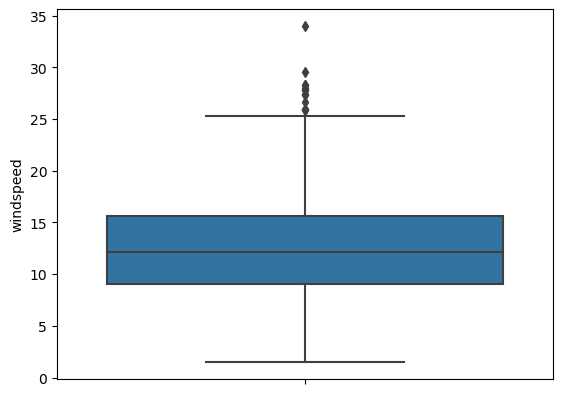

In [730]:
#3.using boxplot
sns.boxplot(y=df["windspeed"])

<Axes: ylabel='temp'>

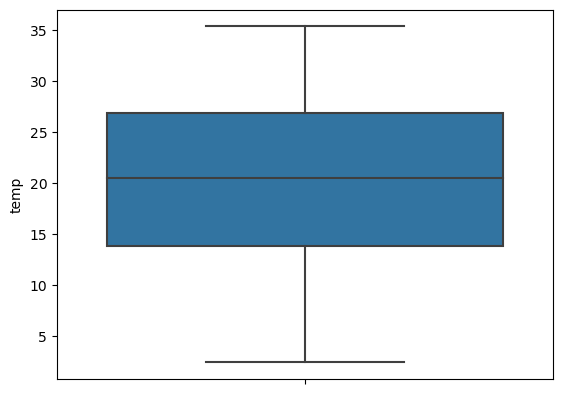

In [731]:
sns.boxplot(y=df["temp"])

<Axes: ylabel='atemp'>

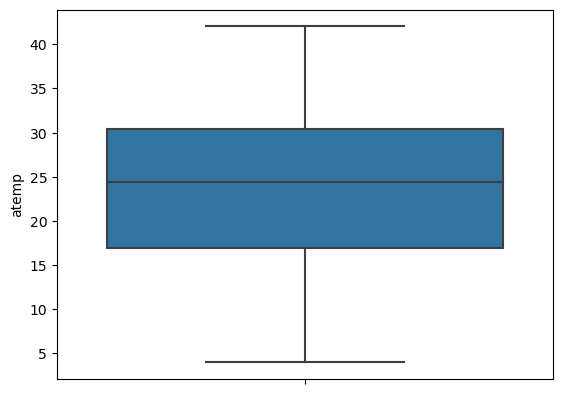

In [732]:
sns.boxplot(y=df["atemp"])

<Axes: ylabel='count'>

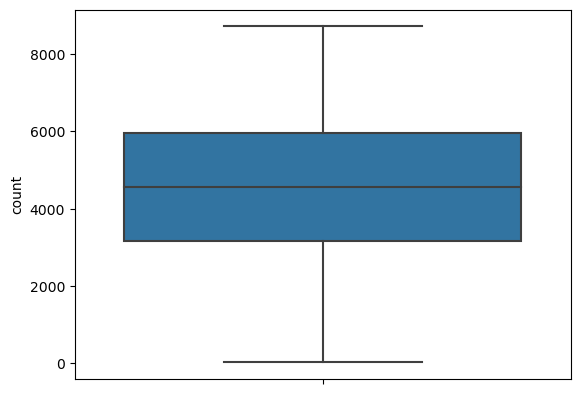

In [733]:
sns.boxplot(y=df["count"])

In [734]:
#Boxplots also gives the same results as the IQR method

In [735]:
df.columns

Index(['date', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')

C:\Users\91880\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


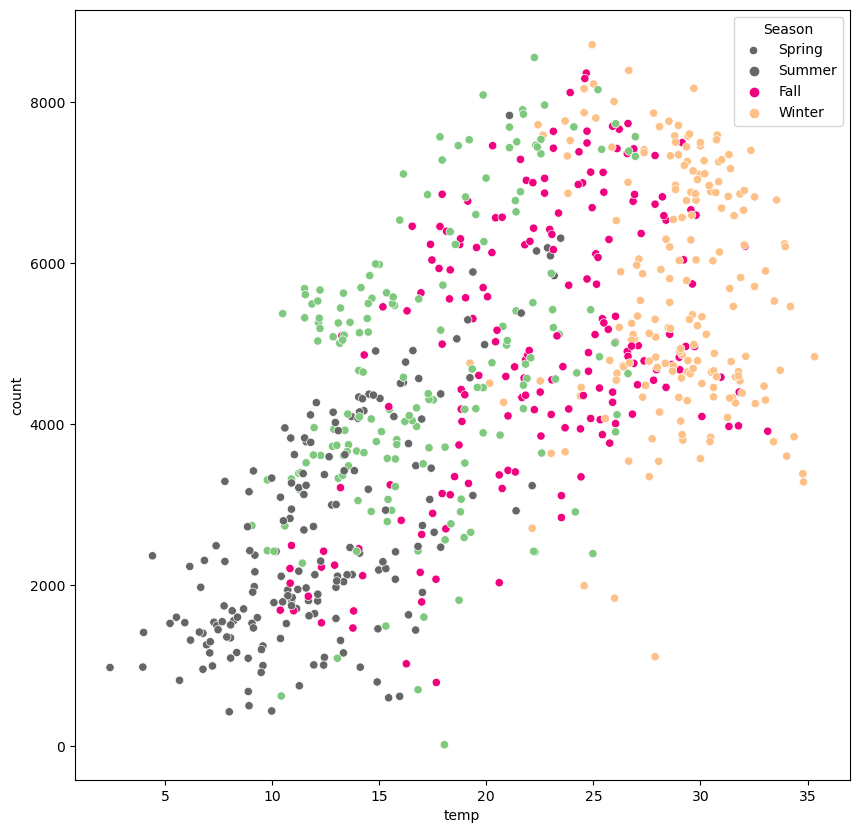

In [736]:
plt.figure(figsize=(10,10))
sns.scatterplot(df['temp'],df['count'],hue=df['season'],palette='Accent_r')
plt.legend(labels = ['Spring', 'Summer', 'Fall', 'Winter'],title="Season")

In [737]:
#inference:The total lowest bikes both casual and registered are in the spring season
#autumn season is preferred for bike rentals when the temp reaches bewteen 25-35 degree celsius.


([<matplotlib.axis.XTick at 0x110cf31bdc0>,
 [Text(0, 0, 'No holiday'), Text(1, 0, 'holiday')])

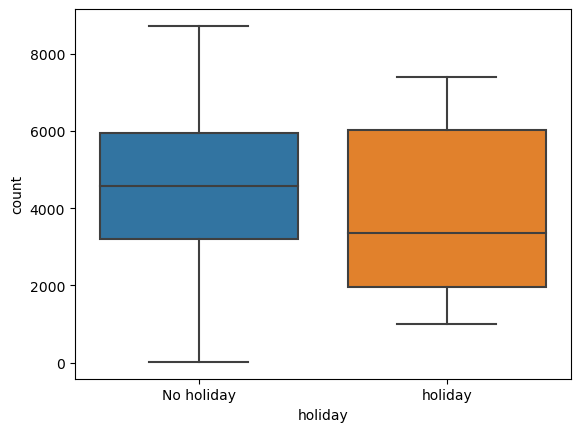

In [738]:

sns.boxplot(y=df["count"],x=df["holiday"])
plt.xticks(ticks=[0,1],labels=["No holiday","holiday"])

In [739]:
count_nonholiday=df["count"].where(df["holiday"]==0).sum()

In [740]:
count_holiday=df["count"].where(df["holiday"]==1).sum()

In [741]:
((count_holiday)/df["count"].sum())*100

2.3834303955367084

In [742]:
#inference:The count of bike rentals varies between 2000-6000 on holidays and between 3500-6000 on non-holidays.
#only 2.38 percent of the bikes were rented on holidays. 

C:\Users\91880\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.axis.XTick at 0x110cf521ee0>,
 [Text(0, 0, '2017'), Text(1, 0, '2018')])

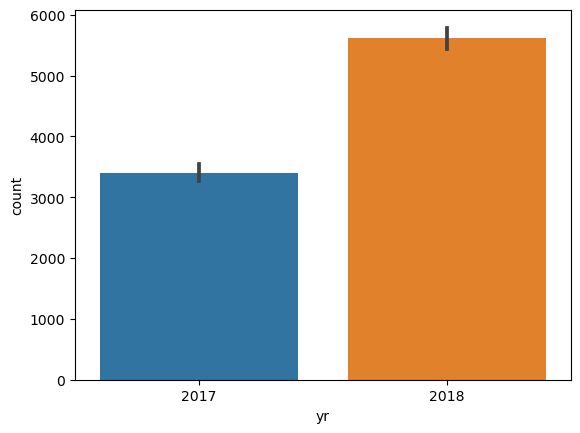

In [743]:
sns.barplot(df["yr"],df["count"])
plt.xticks([0,1],[2017,2018])

In [744]:
count_yr0=df["count"].where(df["yr"]==0).sum()

In [745]:
count_yr1=df["count"].where(df["yr"]==1).sum()

In [746]:
((count_yr1-count_yr0)/count_yr0)*100


64.72826467316062

In [747]:
#inference-there was an increase of 64% rental bikes in 2018 as compared to 2017.

([<matplotlib.axis.XTick at 0x110cf3fec70>,
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'sunday')])

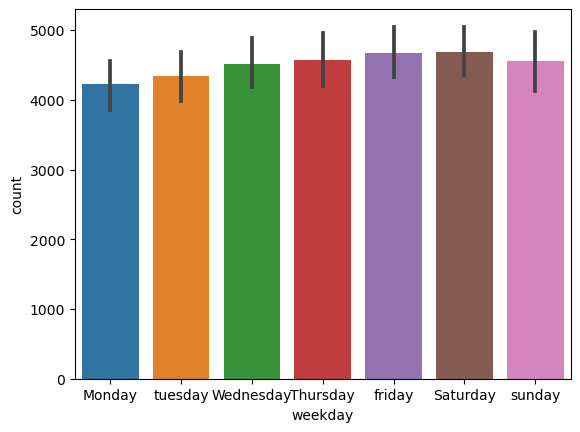

In [748]:
sns.barplot(x=df["weekday"],y=df["count"])
plt.xticks([0,1,2,3,4,5,6],["Monday","tuesday","Wednesday","Thursday","friday","Saturday","sunday"])

In [749]:
#interpretation:The rentals nos are high on Friday or saturday as compared to other days of the week.

C:\Users\91880\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='windspeed', ylabel='count'>

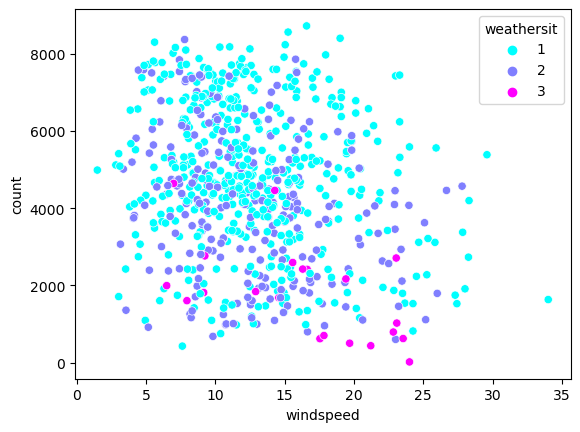

In [750]:
sns.scatterplot(df["windspeed"],df["count"],hue=df["weathersit"],palette='cool')
#plt.legend(["1: Clear, Few clouds, Partly cloudy, Partly cloudy" ,"2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist", "3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds"],loc="upper right",borderpad=2,bbox_to_anchor=(0.35, 1.0))

In [751]:
#the data is more clutered between 7-17 kmph windspeed which means that people prefer low windspeed for bike rentals
#also the bikers prefer Clear, Few clouds, Partly cloudy, Partly cloudy weather for their travel

C:\Users\91880\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='humidity', ylabel='count'>

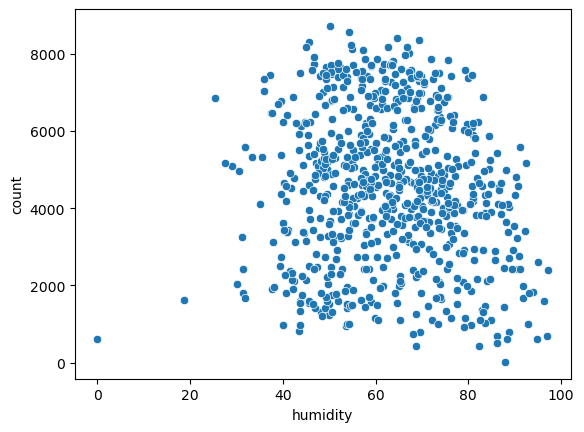

In [752]:
sns.scatterplot(df["humidity"],df["count"],palette='cool')

In [753]:
#interepretation:the people prefer moderate to high humidity for bike rentals as they prefer the humidity between 40-80.

In [754]:
df.columns

Index(['date', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')

In [755]:
df["date"]=pd.to_datetime(df["date"],dayfirst = True)

In [756]:
df["date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 730 entries, 0 to 729
Series name: date
Non-Null Count  Dtype         
--------------  -----         
730 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 KB


In [757]:
df

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,2019-12-28,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,2019-12-29,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,2019-12-30,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [758]:
df['day']=pd.DatetimeIndex(df['date']).day

In [759]:
df

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,day
0,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2
2,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3
3,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4
4,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114,27
726,2019-12-28,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095,28
727,2019-12-29,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341,29
728,2019-12-30,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796,30


In [760]:
help(pd.to_datetime)

Help on function to_datetime in module pandas.core.tools.datetimes:

to_datetime(arg: 'DatetimeScalarOrArrayConvertible', errors: 'str' = 'raise', dayfirst: 'bool' = False, yearfirst: 'bool' = False, utc: 'bool | None' = None, format: 'str | None' = None, exact: 'bool' = True, unit: 'str | None' = None, infer_datetime_format: 'bool' = False, origin='unix', cache: 'bool' = True) -> 'DatetimeIndex | Series | DatetimeScalar | NaTType | None'
    Convert argument to datetime.
    
    This function converts a scalar, array-like, :class:`Series` or
    :class:`DataFrame`/dict-like to a pandas datetime object.
    
    Parameters
    ----------
    arg : int, float, str, datetime, list, tuple, 1-d array, Series, DataFrame/dict-like
        The object to convert to a datetime. If a :class:`DataFrame` is provided, the
        method expects minimally the following columns: :const:`"year"`,
        :const:`"month"`, :const:`"day"`.
    errors : {'ignore', 'raise', 'coerce'}, default 'raise'
   

In [761]:
df.drop("date",axis=1,inplace=True)

In [762]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,day
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114,27
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095,28
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341,29
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796,30


In [763]:
df.drop("day",axis=1,inplace=True)

In [764]:
df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


<Axes: >

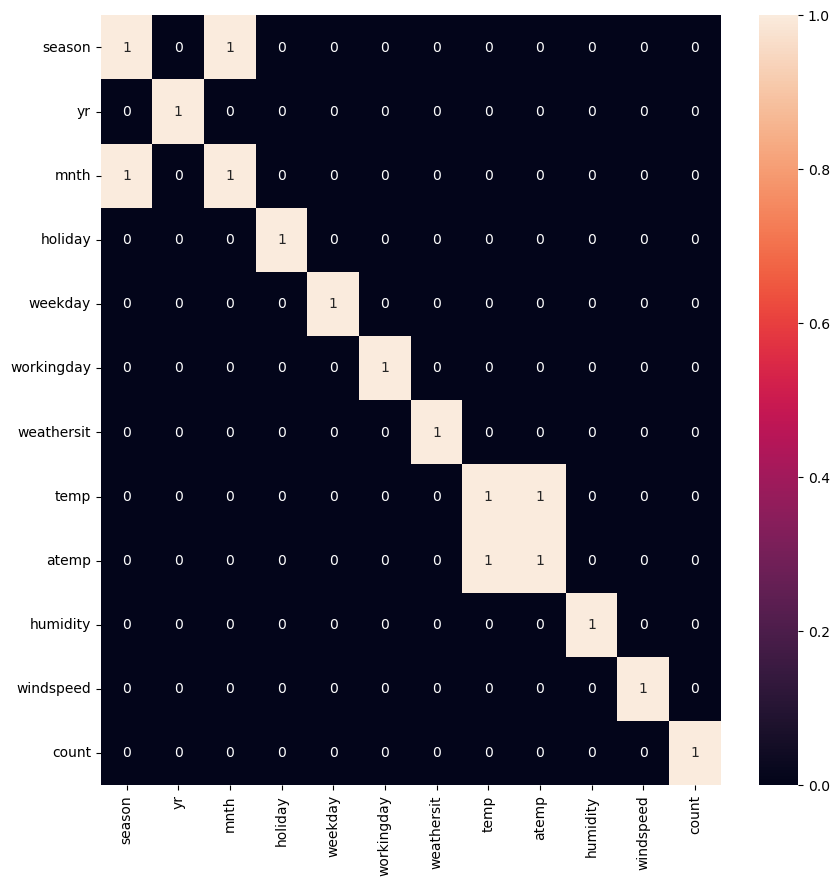

In [765]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr()>0.75,annot=True)

<Axes: >

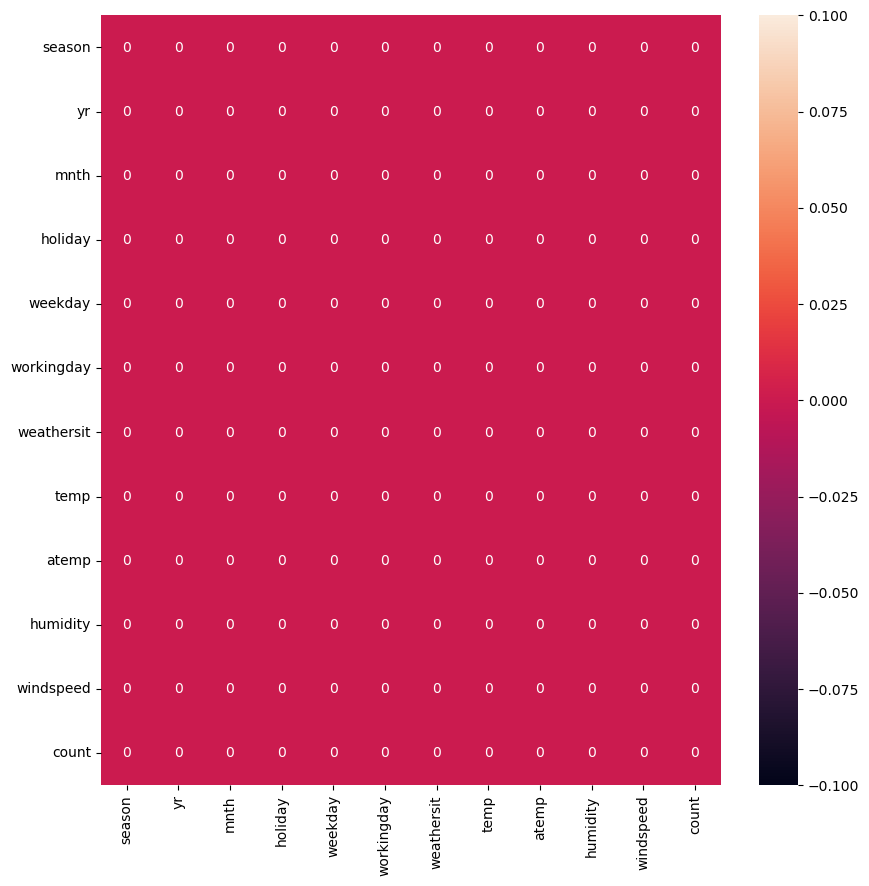

In [766]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr()<-0.75,annot=True)

In [767]:
#the temp and atemp are highly correlated and season and month are highly correlated and hence we will be 
#dropping atemp and month

In [768]:
df.drop(["mnth","atemp"],axis=1,inplace=True)

In [769]:
df

,season,yr,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,1,0,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,0,3,1,1,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...
725,1,1,0,4,1,2,10.420847,65.2917,23.458911,2114
726,1,1,0,5,1,2,10.386653,59.0000,10.416557,3095
727,1,1,0,6,0,2,10.386653,75.2917,8.333661,1341
728,1,1,0,0,0,1,10.489153,48.3333,23.500518,1796


In [770]:
X=df.drop("count",axis=1)
Y=df["count"]

In [771]:
cols=X.columns

In [772]:
df

,season,yr,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,1,0,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,0,3,1,1,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...
725,1,1,0,4,1,2,10.420847,65.2917,23.458911,2114
726,1,1,0,5,1,2,10.386653,59.0000,10.416557,3095
727,1,1,0,6,0,2,10.386653,75.2917,8.333661,1341
728,1,1,0,0,0,1,10.489153,48.3333,23.500518,1796


In [773]:
#scaling or standardization of the data

In [774]:
from sklearn.preprocessing import StandardScaler

In [775]:
standard=StandardScaler()

In [776]:
X[cols]=standard.fit_transform(X[cols])

In [777]:
X

,season,yr,holiday,weekday,workingday,weathersit,temp,humidity,windspeed
0,-1.350819,-1.0,-0.172102,1.497785,-1.469753,1.112127,-0.827613,1.252343,-0.387833
1,-1.350819,-1.0,-0.172102,-1.495052,-1.469753,1.112127,-0.722069,0.480996,0.748899
2,-1.350819,-1.0,-0.172102,-0.996246,0.680387,-0.724644,-1.635432,-1.338073,0.745931
3,-1.350819,-1.0,-0.172102,-0.497440,0.680387,-0.724644,-1.615560,-0.261577,-0.389769
4,-1.350819,-1.0,-0.172102,0.001367,0.680387,-0.724644,-1.468226,-1.340294,-0.046477
...,...,...,...,...,...,...,...,...,...
725,-1.350819,1.0,-0.172102,0.500173,0.680387,1.112127,-1.319509,0.177576,2.059845
726,-1.350819,1.0,-0.172102,0.998979,0.680387,1.112127,-1.324068,-0.264634,-0.452029
727,-1.350819,1.0,-0.172102,1.497785,-1.469753,1.112127,-1.324068,0.880424,-0.853182
728,-1.350819,1.0,-0.172102,-1.495052,-1.469753,-0.724644,-1.310404,-1.014341,2.067858


In [778]:
from sklearn.model_selection import train_test_split

In [779]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [780]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [781]:
def get_VIF(X_train):
  columns = X_train.columns
  # VIF DataFrame
  vif_data = pd.DataFrame()
  vif_data["feature"] = X_train.columns
  # calculating VIF for each feature
  vif_data["VIF"] = [variance_inflation_factor(X_train[columns].values, i) for i in range(len(columns))]
  vif_data = vif_data.sort_values('VIF', ascending=False)
  return vif_data

In [782]:
columns = X_train.columns

In [783]:
get_VIF(X_train)

,feature,VIF
7,humidity,1.843207
5,weathersit,1.727894
6,temp,1.188791
0,season,1.178612
8,windspeed,1.155552
4,workingday,1.088147
2,holiday,1.085669
1,yr,1.021119
3,weekday,1.018545


In [784]:
#A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. 
#VIF equal to 1 = variables are not correlated
#VIF between 1 and 5 = variables are moderately correlated 
#VIF greater than 5 = variables are highly correlated

In [785]:
from sklearn.linear_model import LinearRegression

In [786]:
model=LinearRegression()

In [787]:
model.fit(X_train,Y_train)

LinearRegression()

In [788]:
predicted_y=model.predict(X_test)

In [789]:
model.score(X_train,Y_train)

0.7860620232488651

In [790]:
model.score(X_test,Y_test)

0.8470541053388992

In [791]:
from sklearn.metrics import r2_score

In [792]:
r2_score(Y_test,predicted_y)

0.8470541053388992

In [793]:
#r2 is the measure of the goodness of the fit.It represents the proporation of the variance in the dependent variable which is explained 
#by the independent variables.Higher the r2 score, the better is the model accuracy .However, it is highly dependent on the features even tough the features are not significant, 
#the r2 value can increase.

In [794]:
r2=r2_score(Y_test,predicted_y)

In [795]:
#Adjusted r2

In [796]:
1 - [(1-R²)*(n-1)/(n-k-1)]

SyntaxError: invalid character '²' (U+00B2) (2954491939.py, line 1)

In [ ]:
adj_r1=1-((1-r2)*(X.shape[0]-1))/(X.shape[0]-X.shape[1]-1)

In [ ]:
adj_r1

In [ ]:
from sklearn import metrics

In [ ]:
def evaluation(y,predictions):
    mae=metrics.mean_absolute_error(y,predictions)
    mse=metrics.mean_squared_error(y,predictions)
    rmse=np.sqrt(mse)
    return mae,mse,rmse

In [ ]:
mae,mse,rmse=evaluation(Y_test,predicted_y)

In [ ]:
print("MAE",mae)
print("MSE",mse)
print("RMSE",rmse)

In [ ]:
sns.regplot(Y_test,predicted_y)

In [ ]:
#Linear regression using Statsmodels


In [ ]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

In [ ]:
X_train_inter=sm.add_constant(X_train)
X_test_inter=sm.add_constant(X_test)

In [797]:
regression_OLS = sm.OLS(endog= Y_train , exog = X_train_inter).fit()

In [798]:
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     234.3
Date:                Wed, 19 Apr 2023   Prob (F-statistic):          9.48e-186
Time:                        22:50:04   Log-Likelihood:                -4803.5
No. Observations:                 584   AIC:                             9627.
Df Residuals:                     574   BIC:                             9671.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4481.7642     37.858    118.384      0.000    4407.407    4556.121
season       454.6574     41.143     11.051      0.000     373.847     535.467
yr          1000.6585     38.119     26.251      0.000     925.789    1075.528
holiday      -93.3094     37.017     -2.521      0.012    -166.015     -20.604
weekday      134.8156     37.874      3.560      0.000      60.428     209.203
workingday    75.7821     39.000      1.943      0.052      -0.817     152.382
weathersit  -344.8163     48.711     -7.079      0.000    -440.489    -249.144
temp         962.0816     41.269     23.312      0.000     881.024    1043.139
humidity    -131.6290     51.178     -2.572      0.010    -232.147     -31.111
windspeed   -207.8226     41.965     -4.952      0.000    -290.246    -125.400
==============================================================================
Omnibus:                       59.590   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.834
Skew:                          -0.625   Prob(JB):                     3.15e-25
Kurtosis:                       4.753   Cond. No.                         2.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [799]:
regression_OLS = sm.OLS(endog= Y_test , exog = X_test_inter).fit()

In [800]:
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     95.05
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           3.24e-54
Time:                        22:50:25   Log-Likelihood:                -1160.5
No. Observations:                 146   AIC:                             2341.
Df Residuals:                     136   BIC:                             2371.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4641.2671     62.044     74.806      0.000    4518.571    4763.963
season       457.8821     65.225      7.020      0.000     328.896     586.868
yr          1130.8849     61.029     18.530      0.000    1010.196    1251.574
holiday      -58.2508     88.951     -0.655      0.514    -234.157     117.655
weekday      103.1670     62.604      1.648      0.102     -20.637     226.971
workingday   -51.2560     63.673     -0.805      0.422    -177.173      74.662
weathersit  -248.9761     88.683     -2.807      0.006    -424.352     -73.601
temp         916.8612     67.059     13.673      0.000     784.249    1049.474
humidity    -190.7064     86.776     -2.198      0.030    -362.311     -19.101
windspeed   -234.5716     60.247     -3.894      0.000    -353.713    -115.430
==============================================================================
Omnibus:                       11.984   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.322
Skew:                          -0.582   Prob(JB):                      0.00128
Kurtosis:                       3.913   Cond. No.                         3.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""